# Parameters:	

### Data : rectangular dataset

2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

### Parameters:

* **vmin, vmax :** floats, optional

    Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

* **cmap :** matplotlib colormap name or object, or list of colors, optional

    The mapping from data values to color space. If not provided, the default will depend on whether center is set.

* **center :** float, optional

    The value at which to center the colormap when plotting divergant data. Using this parameter will change the default cmap if none is specified.

* **robust :** bool, optional

    If True and vmin or vmax are absent, the colormap range is computed with robust quantiles instead of the extreme values.

* **annot :** bool or rectangular dataset, optional

    If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the raw data.

* **fmt :** string, optional

    String formatting code to use when adding annotations.

* **annot_kws :** dict of key, value mappings, optional

    Keyword arguments for ax.text when annot is True.

* **linewidths :** float, optional

    Width of the lines that will divide each cell.

* **linecolor :** color, optional

    Color of the lines that will divide each cell.

* **cbar :** boolean, optional

    Whether to draw a colorbar.

* **cbar_kws :** dict of key, value mappings, optional

    Keyword arguments for fig.colorbar.

* **cbar_ax :** matplotlib Axes, optional

    Axes in which to draw the colorbar, otherwise take space from the main Axes.
    
* **square :** boolean, optional

    If True, set the Axes aspect to “equal” so each cell will be square-shaped.

* **xticklabels, yticklabels :** “auto”, bool, list-like, or int, optional

    If True, plot the column names of the dataframe. If False, don’t plot the column names. If list-like, plot these alternate labels as the xticklabels. If an integer, use the column names but plot only every n label. If “auto”, try to densely plot non-overlapping labels.

* **mask :** boolean array or DataFrame, optional

    If passed, data will not be shown in cells where mask is True. Cells with missing values are automatically masked.

* **ax :** matplotlib Axes, optional

    Axes in which to draw the plot, otherwise use the currently-active Axes.

* **kwargs :** other keyword arguments

    All other keyword arguments are passed to ax.pcolormesh.

## Returns:	
    
* **ax :** matplotlib Axes

    Axes object with the heatmap.
    
***

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(35510)

import seaborn as sns
sns.set()    # http://seaborn.pydata.org/generated/seaborn.set.html

In [3]:
# create uniform data
data = np.random.rand(10, 15)

Simple heatmap plot

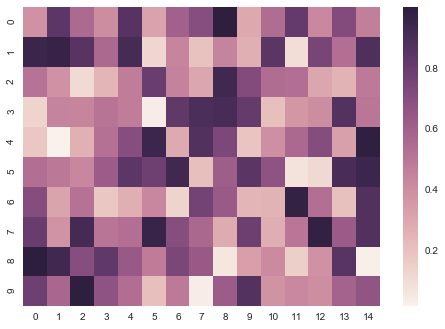

In [4]:
ax = sns.heatmap(data)
plt.show()

Changing the limits of the colormap

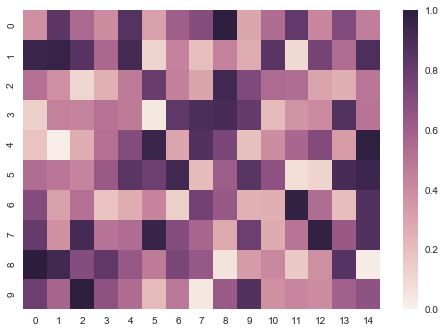

In [20]:
ax = sns.heatmap(data, vmin = 0, vmax = 1)
plt.show()

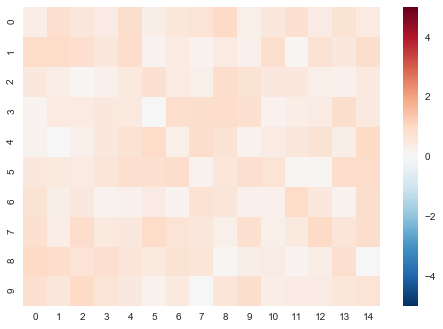

In [5]:
ax = sns.heatmap(data, vmin = -5, vmax = 5)
plt.show()

Plot a heatmap for data centered on 0 with a diverging colormap

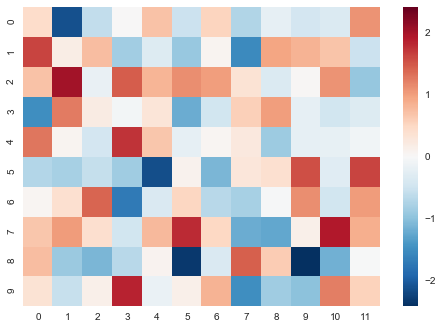

In [6]:
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center = 0)
plt.show()

Plot a dataframe with meaningful row and column labels

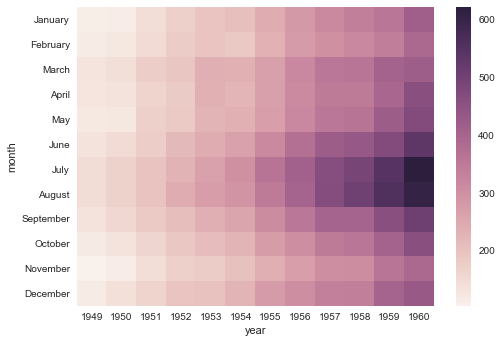

In [7]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

ax = sns.heatmap(flights)
plt.show()

Annotate each cell with the numeric value using integer formatting

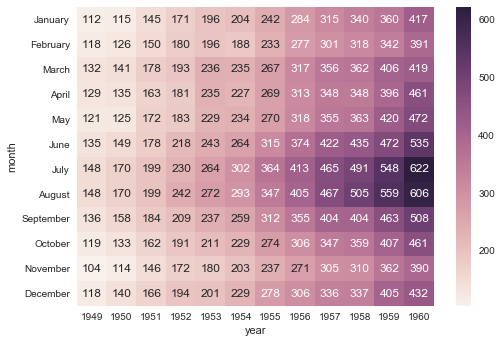

In [23]:
ax = sns.heatmap(flights, annot = True, fmt = "d")
plt.show()

Add lines between each cell

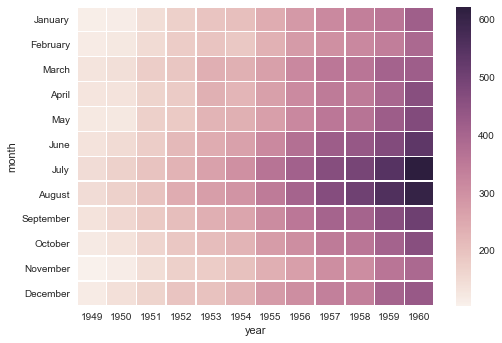

In [8]:
ax = sns.heatmap(flights, linewidths = .5)
plt.show()

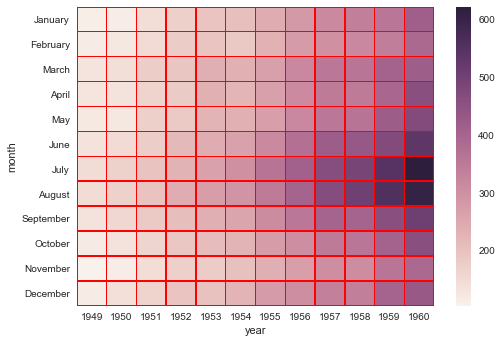

In [25]:
ax = sns.heatmap(flights, linewidths = .5, linecolor = 'red')
plt.show()

Use a different colormap

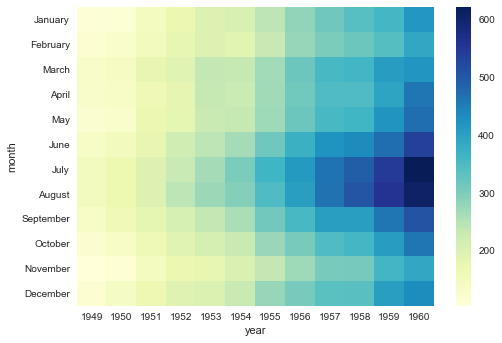

In [26]:
ax = sns.heatmap(flights, cmap = "YlGnBu")
plt.show()

Center the colormap at a specific value

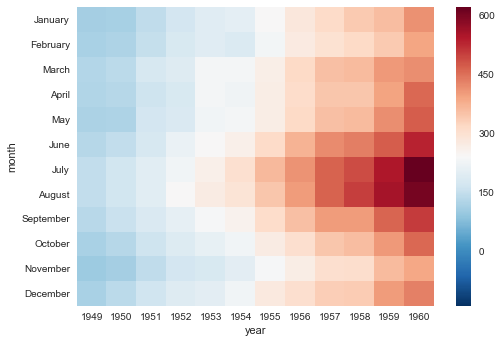

In [27]:
ax = sns.heatmap(flights, center = flights.loc["January", 1955])
plt.show()

Plot every other column label and don't plot the row labels

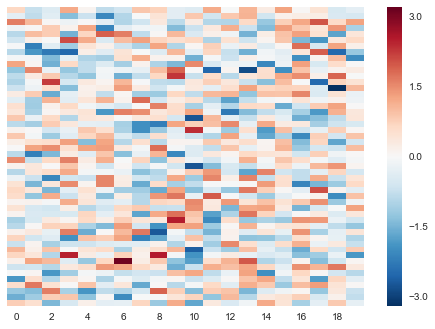

In [9]:
data = np.random.randn(50, 20)
ax = sns.heatmap(data, xticklabels = 2, yticklabels = False)
plt.show()

Don't draw a colorbar

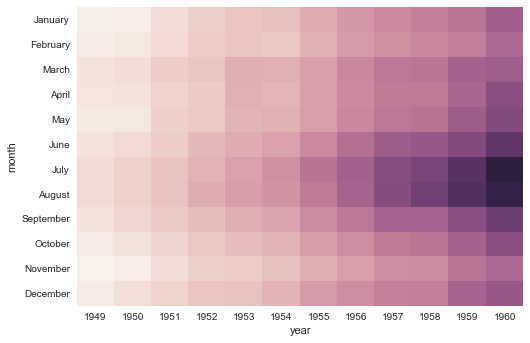

In [10]:
ax = sns.heatmap(flights, cbar = False)
plt.show()

Use different axes for the colorbar

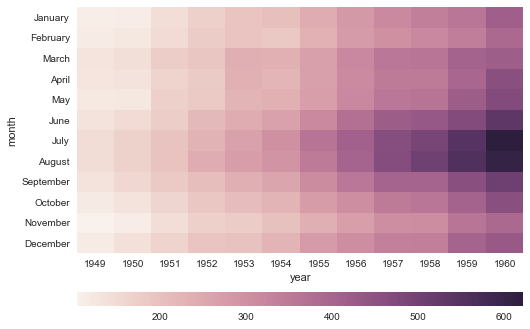

In [30]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw = grid_kws)
ax = sns.heatmap(flights, ax = ax,
                 cbar_ax = cbar_ax,
                 cbar_kws = {"orientation": "horizontal"})
plt.show()

Use a mask to plor only part of a matrix

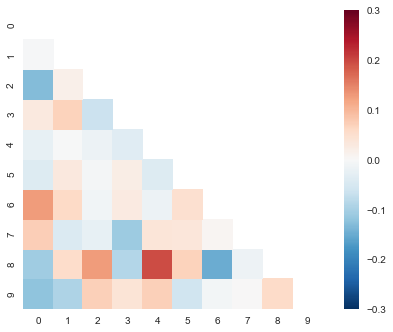

In [11]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask = mask, vmax = .3, square = True)
plt.show()

In [32]:
 # https://seaborn.pydata.org/generated/seaborn.heatmap.html